# Task: Credit Card Fraud Detection


---



#### *Karla Esther Escamilla Gachuz | B.S. Data Science, ESCOM IPN* | Data Science Challenge

## Dataset Description


---


This case requires to develop a **customer segmentation** to define marketing strategy. The sample Dataset summarizes the **usage behavior of about 9000 active credit card holders during the last 6 months.** The file is at a customer level with 18 behavioral variables.

**Note:** *The file used in this task was updated with the additional fields: **activated_date**, **last_payment_date**, and **fraud**.*

#### With data from a public Kaggle dataset. [Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)


### How to run the code?

Cell by cell from the beginning.

## Content Summary


---

- [Overview.](#Overview)
- [Question 1: Exploratory Data Analysis (EDA).](#Question-1:-Exploratory-Data-Analysis-(EDA))
  - [1.1 Histogram of the balance amount.](#1.1-Histogram-of-the-balance-amount)
  - [1.2 Hypotheses and observations.](#1.2-Hypotheses-and-observations)
  - [1.3 Mean and median balance.](#1.3-Mean-and-median-balance)
- [Question 2:  Customer's account activation and last payment during 2020.](#Question-2:-Customer's-account-activation-and-last-payment-during-2020)
- [Question 3: Predictive fraud modeling.](#Question-3:-Predictive-fraud-modeling)
  - [THE explanatory variable.](#THE-explanatory-variable)


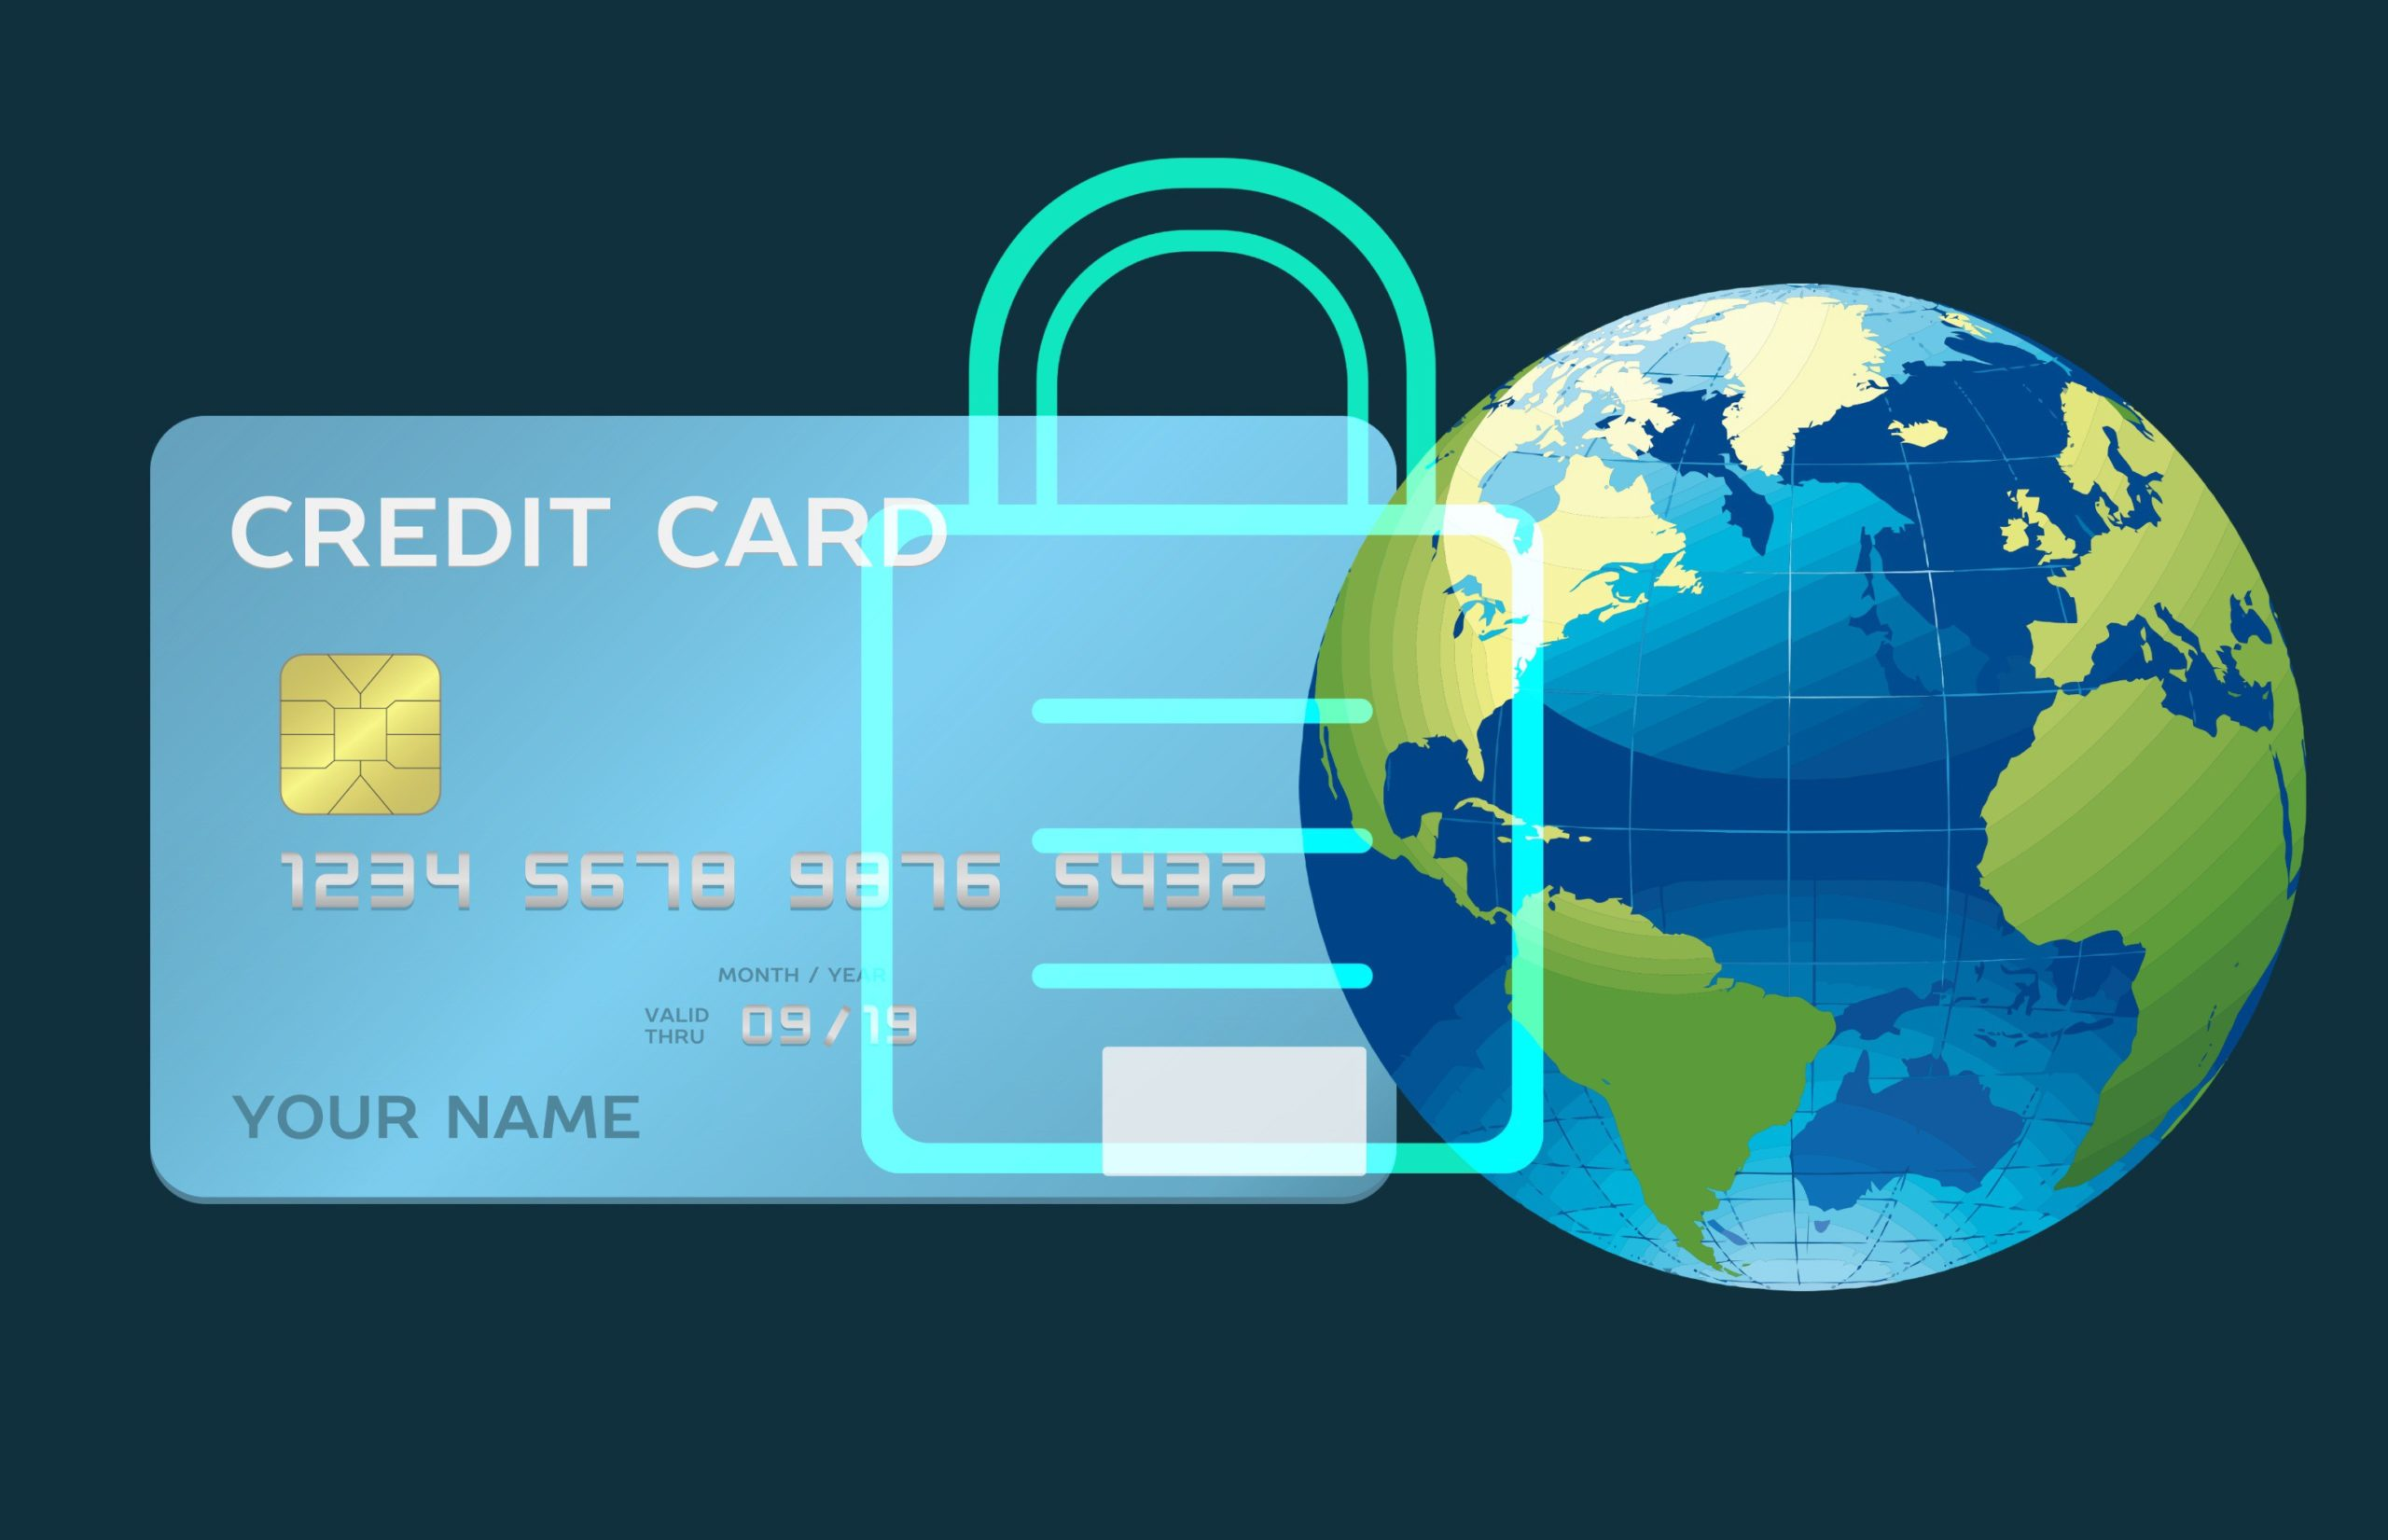

# Overview

### a) We got **8950 Observations.**


*   8880 No fraud tagged (99.21%).
*   70 Fraud tagged (0.78%).






### Goal


---

Analyze **customer behavior** in credit card services to **model irregular patterns** and enhance fraud detection efficiency.




### Variable Dictionary.


*With descriptions provided by the Kaggle site.*

---

- **CUST_ID** : Identification of Credit Card holder (Categorical).
- **BALANCE** : Balance amount left in their account to make purchases .
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- **PURCHASES** : Amount of purchases made from account.
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go.
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment.
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid.
- **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced".
- **PURCHASES_TRX** : Numbe of purchase transactions made.
- **CREDIT_LIMIT** : Limit of Credit Card for user.
- **PAYMENTS** : Amount of Payment done by user.
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user.
- **PRCFULLPAYMENT** : Percent of full payment paid by user.
- **TENURE** : Tenure of credit card service for user.

*Additional to the assumptions:*

- **activated_date** : The date when the credit card was first activated and became usable.
- **last_payment_date** : The most recent date when a payment was made on the credit card account.
- **fraud** : *Target* showing whether fraudulent activity has been detected on the account, which corresponds to:
  - 0 No fraud (legitimate transaction or account).
  - 1 Fraud detected (suspicious or fraudulent activity).







In [150]:
#verifying features and properties.
import pandas as pd

data=pd.read_csv('/content/Stori_Data_Challenge (7).csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   cust_id                           8950 non-null   object 
 2   activated_date                    8937 non-null   object 
 3   last_payment_date                 8941 non-null   object 
 4   balance                           8948 non-null   float64
 5   balance_frequency                 8950 non-null   float64
 6   purchases                         8950 non-null   float64
 7   oneoff_purchases                  8950 non-null   float64
 8   installments_purchases            8950 non-null   float64
 9   cash_advance                      8838 non-null   float64
 10  purchases_frequency               8950 non-null   float64
 11  oneoff_purchases_frequency        8950 non-null   float64
 12  purcha

In [126]:
data.sample(5)

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
2426,2427,C12500,2019-12-24,2020-10-13,3625.207579,1.000000,0.00,0.00,0.00,1274.199991,...,0.000000,0.090909,1,0,6000.0,1009.287105,1431.909784,0.000000,11,0
1754,1755,C11814,2019-11-30,2020-10-07,912.360030,1.000000,10709.17,9689.36,1019.81,0.000000,...,1.000000,0.000000,0,49,15000.0,11381.633960,299.249818,1.000000,12,0
8127,8128,C18347,2020-07-05,2020-09-26,1726.035224,1.000000,1065.65,1065.65,0.00,3004.987382,...,0.000000,0.500000,18,9,3000.0,5807.675792,830.737525,0.083333,12,0
1316,1317,C11361,2019-11-16,2020-10-16,3143.231320,1.000000,255.08,129.52,125.56,0.000000,...,0.333333,0.000000,0,11,5500.0,734.825068,841.525188,0.000000,12,0
8677,8678,C18914,2020-07-22,2020-09-16,0.648074,0.272727,258.00,0.00,258.00,0.000000,...,1.000000,0.000000,0,12,1000.0,320.135581,26.334342,0.200000,12,0


In [52]:
#verifying proportions
data['fraud'].value_counts()

,count
fraud,
0,8880
1,70


In [53]:
#verifying null values
data.isnull().sum()

,0
Unnamed: 0,0
cust_id,0
activated_date,13
last_payment_date,9
balance,2
balance_frequency,0
purchases,0
oneoff_purchases,0
installments_purchases,0
cash_advance,112


- We've found some nulls, but we will consider them low risk for our model training, since we'll be using XGBoost model.

# Question 1: Exploratory Data Analysis (EDA)
## 1.1 Histogram of the balance amount

- Transformed raw count to density by using the KDE curve representation and for a smoother viasualization.
- Used llamative but solid color palette due to the short range of visibly higher values.
- Smoothed density to the value of 1.5 for a better understanding of the shape of behavior.
- Manually added helpful analytic metrics to see more useful information.

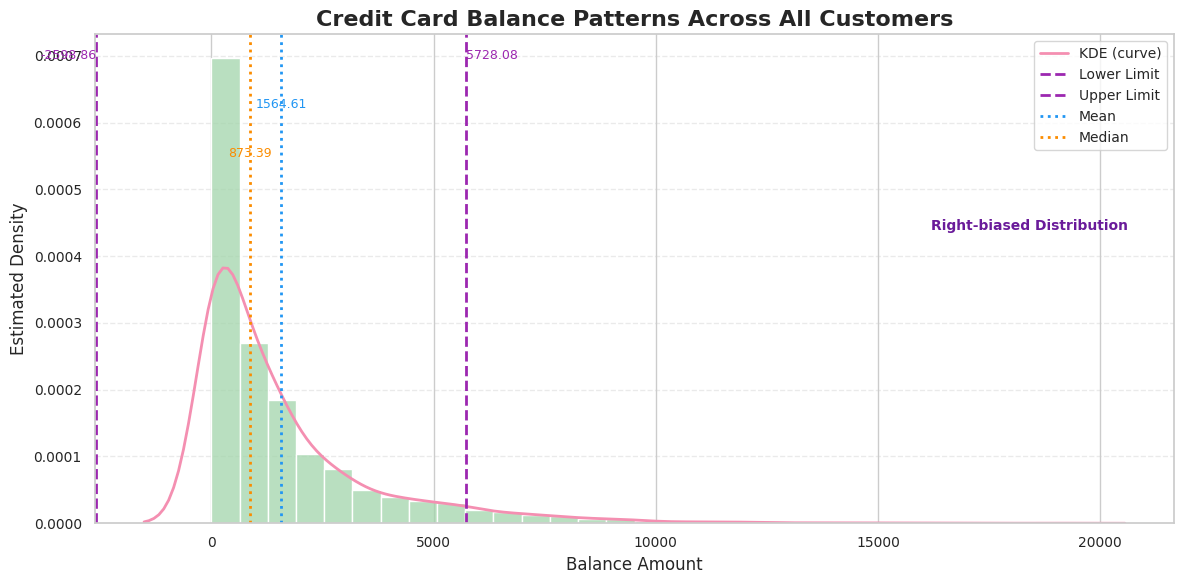

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

#manual calculus
mean = data['balance'].mean()
std = data['balance'].std()
median = data['balance'].median()

lower_limit = mean - 2 * std
upper_limit = mean + 2 * std


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))


sns.histplot(
    data=data,
    x="balance",
    bins=30,
    color="#A2D5AB",  # verde más suave
    stat="density",
    edgecolor="white"
)

# KDE curve
sns.kdeplot(
    data=data,
    x="balance",
    color="#F48FB1",
    linewidth=2,
    label="KDE (curve)",
    bw_adjust=1.5
)


plt.axvline(lower_limit, color="#9C27B0", linestyle="--", linewidth=2, label="Lower Limit")
plt.axvline(upper_limit, color="#9C27B0", linestyle="--", linewidth=2, label="Upper Limit")
plt.axvline(mean, color="#2196F3", linestyle=":", linewidth=2, label="Mean")
plt.axvline(median, color="#FB8C00", linestyle=":", linewidth=2, label="Median")


plt.text(lower_limit, plt.ylim()[1]*0.95, f"{lower_limit:.2f}", color="#9C27B0", ha="right", fontsize=9)
plt.text(upper_limit, plt.ylim()[1]*0.95, f"{upper_limit:.2f}", color="#9C27B0", ha="left", fontsize=9)
plt.text(mean, plt.ylim()[1]*0.85, f"{mean:.2f}", color="#2196F3", ha="center", fontsize=9)
plt.text(median, plt.ylim()[1]*0.75, f"{median:.2f}", color="#FB8C00", ha="center", fontsize=9)


plt.text(plt.xlim()[1]*0.85, plt.ylim()[1]*0.6, "Right-biased Distribution",
         color="#6A1B9A", fontsize=10, ha='center', fontweight='bold')


plt.xlabel("Balance Amount", fontsize=12)
plt.ylabel("Estimated Density", fontsize=12)
plt.title("Credit Card Balance Patterns Across All Customers", fontsize=16, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.legend(fontsize=10)

plt.show()


## 1.2 Hypothesis and observations

- We have a right skewed distribution of the balance, where **most of the values are under the 5000 higher limit amount**, which tells us that *maybe **there are more users with a (based on this scale) "low" credit balance approved**, and/or maybe that **most of the users does not use all of their credit limit that often**.*
- There is a relatively short standard deviation around the 2000 units, which tells us about the range of the usual balances: from 0 to 5000. Some balances over the 5000 amount could be detected as fraud.
- A particularly higher proportion of the accounts have their balance at 0, as we can see with the mode value:

In [56]:
data['balance'].mode()

,balance
0,0.0


In [57]:
data['balance'].std()

2081.7356346036536

- We also have some outliers with higher balance amounts. We review the balance limits:

In [58]:
data['balance'].describe()

,balance
count,8948.000000
mean,1564.612804
std,2081.735635
min,0.000000
25%,128.234272
50%,873.385231
75%,2054.525476
max,19043.138560


Then we see maximum balance value is by 19,043.13 units, which is far from the estimated limit for a normal balance. *Is it fraud classified?*

In [151]:
filtered_data = data[data['balance'] == 19043.138560]
print(filtered_data[['balance', 'fraud']])

         balance  fraud
138  19043.13856      1


It is fraud! So maybe our hypothesis adquires shape:

**Users tend have a balance of 0 on their credit card accounts, if not the usual is to have around 1564.61 units with a standard deviation of 2081.73 units. Amounts over the estimated quantity of 5000 units can be considered unusual and therefore, potentially fraud.**

## 1.3 Mean and median balance

In [71]:
#we standarize the date format
data['activated_date'] = pd.to_datetime(data['activated_date'])

data['year'] = data['activated_date'].dt.year
data['month'] = data['activated_date'].dt.month

#grouping
balance_summary = data.groupby(['year', 'month'])['balance'].agg(['mean', 'median']).reset_index()
balance_summary.sort_values(by=['year', 'month'])

,year,month,mean,median
0,2019.0,10.0,2482.234166,1524.409377
1,2019.0,11.0,1848.704323,1082.071173
2,2019.0,12.0,2018.788906,1162.588384
3,2020.0,1.0,1854.535889,1175.749847
4,2020.0,2.0,1747.350977,994.841733
5,2020.0,3.0,1554.973023,828.954823
6,2020.0,4.0,1483.183191,910.141912
7,2020.0,5.0,1214.333732,734.557681
8,2020.0,6.0,939.997996,472.791862
9,2020.0,7.0,649.717622,221.291290


We got two years to compare. 2019 with only the last three months available, and 2020 with the first seven months, all in cronological sorting.

- **The highest amounts are achieved in 2019**, being the only ones who increased the balance amount up to 2482 units approximately.
- In 2020 amounts mantain on a ratio from 900 to 1200 approximately in the first quarter.
- **But from the fifth month the quantity only lowers.**

We can see this better on a chart:

### Mean and median balance plot
- We format the date to appear with the appropriate name of the month associated with the number.
- We also sort values by year and month for a better reading.

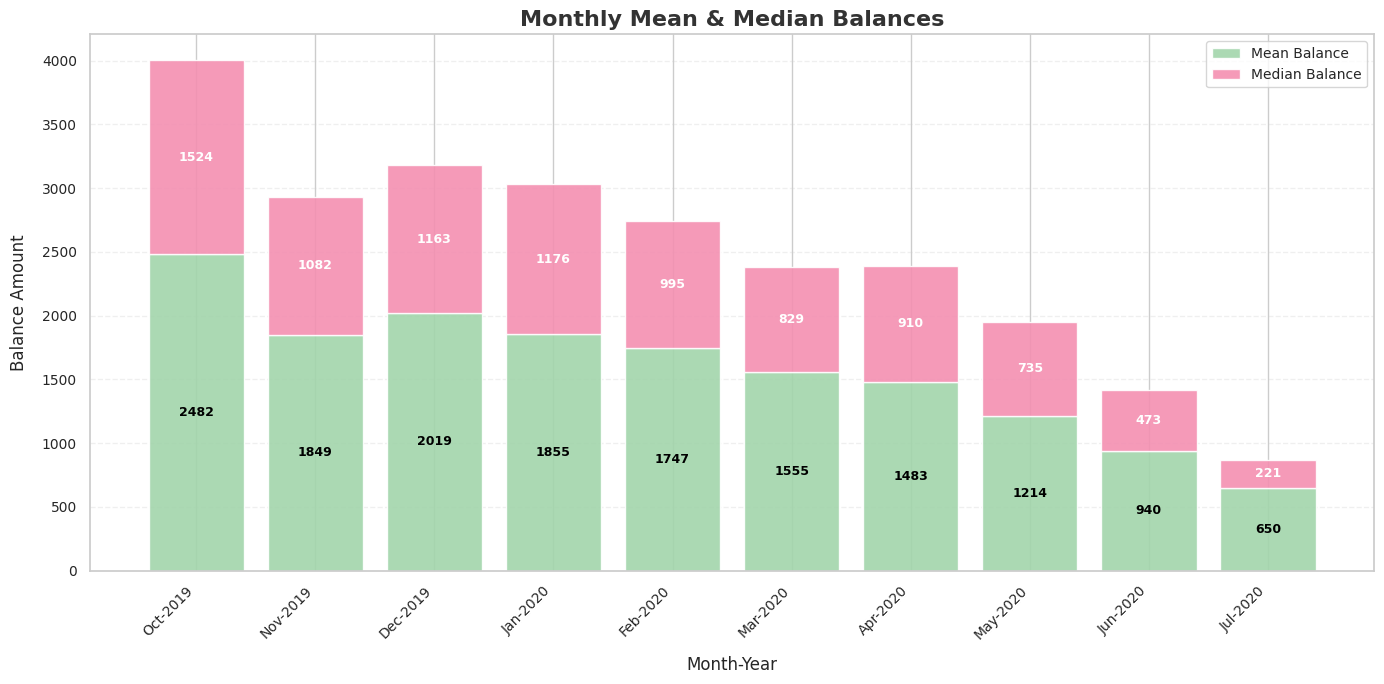

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


balance_summary_sorted = balance_summary.sort_values(by=["year", "month"])
balance_summary_sorted["month_year"] = pd.to_datetime(
    balance_summary_sorted[['year', 'month']].assign(day=1)
).dt.strftime('%b-%Y')


sns.set(style="whitegrid")


color_mean = "#A2D5AB"
color_median = "#F48FB1"

plt.figure(figsize=(14, 7))


for i, (index, row) in enumerate(balance_summary_sorted.iterrows()):
    x_value = row["month_year"]

    plt.bar(x_value, row["mean"], color=color_mean, alpha=0.9,
            label="Mean Balance" if i == 0 else "")
    plt.bar(x_value, row["median"], bottom=row["mean"], color=color_median, alpha=0.9,
            label="Median Balance" if i == 0 else "")

    plt.text(x_value, row["mean"] / 2, f"{row['mean']:.0f}",
             ha="center", va="center", fontsize=9, color="black", weight='bold')
    plt.text(x_value, row["mean"] + row["median"] / 2, f"{row['median']:.0f}",
             ha="center", va="center", fontsize=9, color="white", weight='bold')


plt.xlabel("Month-Year", fontsize=12, labelpad=10)
plt.ylabel("Balance Amount", fontsize=12, labelpad=10)
plt.title("Monthly Mean & Median Balances", fontsize=16, weight='bold', color="#333333")

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.legend(loc='upper right', frameon=True, fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


- **The usual amount in the balance credit card accounts only decreases along time.**
- It can be inferred that **users do not prefer having higher amounts in their balances**, as time passes, *maybe because of the emergence of alternatives or different financial habits.*
- This could be also reflected closely on the economic impact due to the COVID pandemy, which precisely happened to start and have an upturn by those dates.

# Question 2: Customer's account activation and last payment during 2020.



*   Added the copy specification on filtered data for avoiding warnings while modifying a view, so we modify a copy of the data.



In [114]:
#convert dates to datetime
data['activated_date'] = pd.to_datetime(data['activated_date'])
data['last_payment_date'] = pd.to_datetime(data['last_payment_date'])

#filter relevant customers
filtered_data = data[
    (data['activated_date'].dt.year == 2020) &
    (data['last_payment_date'].dt.year == 2020)
].copy()

#cust_id
filtered_data.loc[:, 'cust_id'] = filtered_data['cust_id'].astype(str).str.replace(r'[a-zA-Z]', '', regex=True)

#format dates properly
filtered_data['activated_date'] = pd.to_datetime(filtered_data['activated_date']).dt.to_period('M').astype(str)
filtered_data['last_payment_date'] = pd.to_datetime(filtered_data['last_payment_date']).dt.strftime('%Y-%m-%d')


#cash_advance as percentage of credit_limit
filtered_data.loc[:, 'cash_advance_pct'] = (filtered_data['cash_advance'] / filtered_data['credit_limit']) * 100

report = filtered_data[['cust_id', 'activated_date', 'last_payment_date', 'cash_advance', 'credit_limit', 'cash_advance_pct']]

report.sample(10)

,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,cash_advance_pct
7568,17773,2020-06,2020-07-07,0.000000,5000.000000,0.000000
7731,17940,2020-06,2020-06-29,667.057963,4000.000000,16.676449
4092,14208,2020-02,2020-10-06,0.000000,8500.000000,0.000000
3033,13122,2020-01,2020-07-18,777.912775,1500.000000,51.860852
8265,18486,2020-07,2020-09-03,5910.814550,2500.000000,236.432582
7492,17695,2020-06,2020-06-23,0.000000,1700.000000,0.000000
8436,18664,2020-07,2020-05-08,4300.701115,6000.000000,71.678352
6503,16681,2020-05,2020-10-30,0.000000,1000.000000,0.000000
3264,13358,2020-01,2020-06-25,6543.824302,10000.000000,65.438243
8485,18715,2020-07,2020-10-28,0.000000,1833.333333,0.000000


In [63]:
report.describe()

,cash_advance,credit_limit,cash_advance_pct
count,6300.000000,6299.000000,6299.000000
mean,892.404899,3897.363306,25.237842
std,1827.687093,3186.271867,49.217864
min,0.000000,50.000000,0.000000
25%,0.000000,1500.000000,0.000000
50%,0.000000,3000.000000,0.000000
75%,1030.260804,5500.000000,38.927165
max,26268.699890,30000.000000,1957.961261


- We see a diverse range of credit limit approvals, from 50 (which is really low, can also speak of a lack of credit history or poor reputation), to 30,000.
- Many accounts request cash advances, for example we see the customer with ID: 13817, who requested about the 92.57% of their credit limit on cash advance, what can be a target for financial risk.
- Low cash advance percentages can show healthier financial habits.

Lets search more:

In [74]:
higher_advance=report[report['cash_advance_pct']>=70]
higher_advance.count()

,0
cust_id,907
activated_date,907
last_payment_date,907
cash_advance,907
credit_limit,907
cash_advance_pct,907


From the approximate of 6000 cash advances cases on this report, **887 are higher percentage cash advances, which represent a proportion of 14.78%**. *Quite high fraud potential for a single year.*

# Question 3: Predictive fraud modeling
- Comprobamos correlacion de variables:



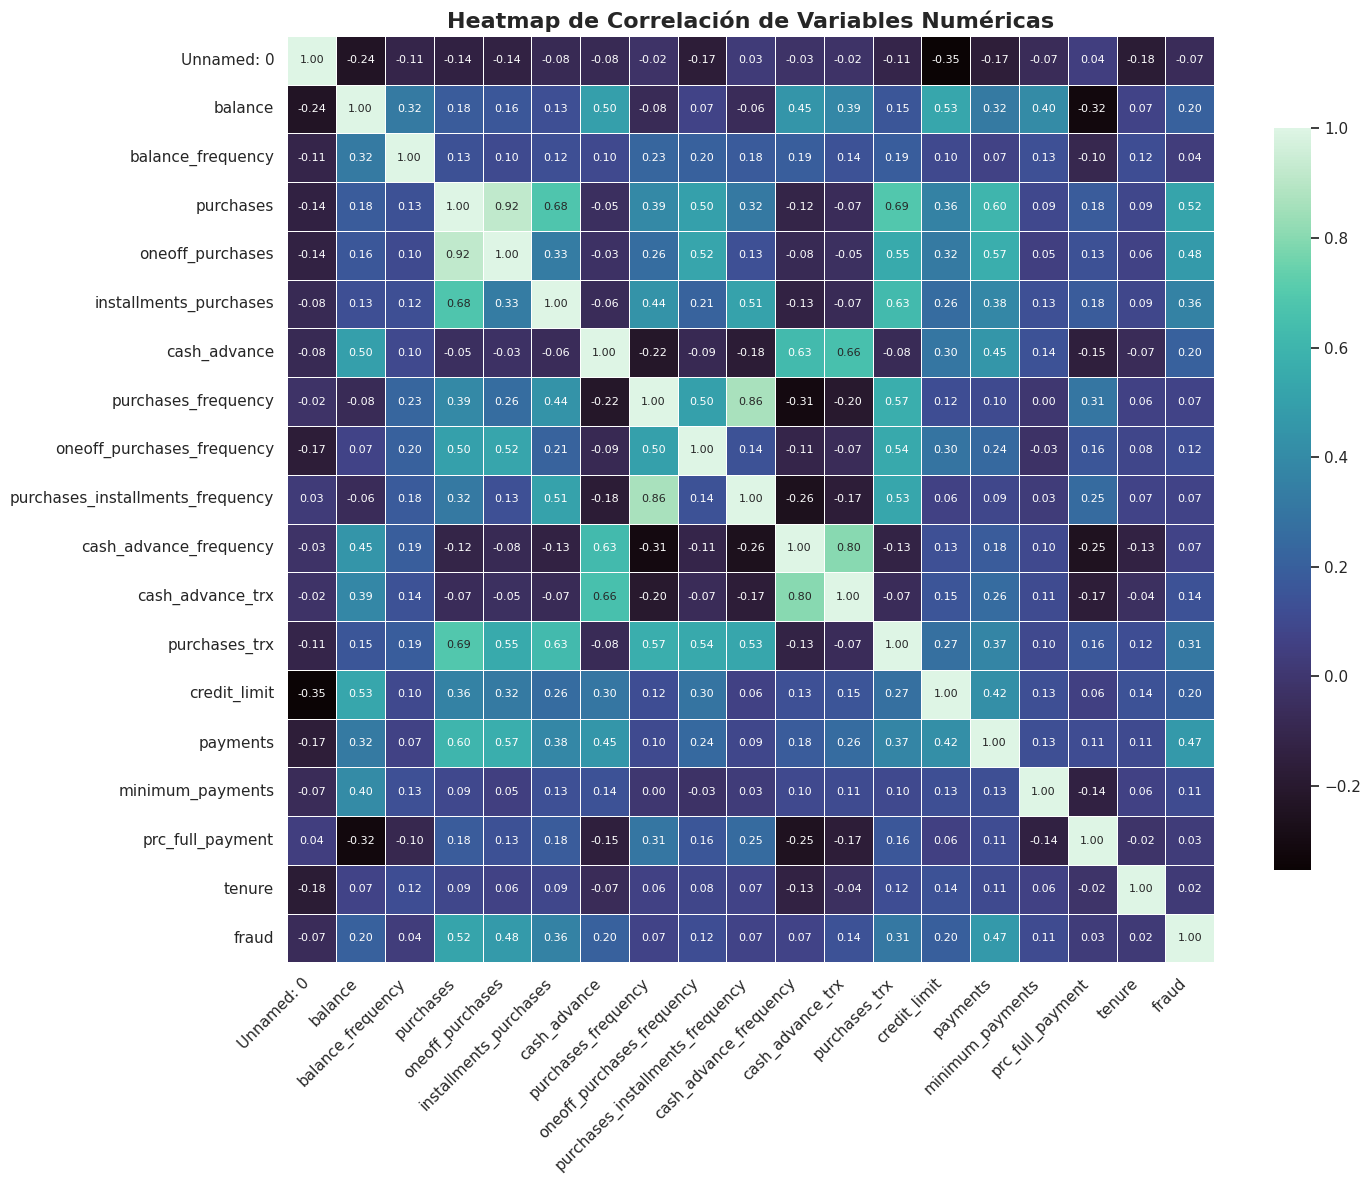

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(15, 12))
sns.set(style='white')

heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="mako",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)

plt.title("Heatmap de Correlación de Variables Numéricas", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar
plt.show()


- Many variables are strongly correlated and could cause redundance or not relevant experience to the model, but for instance of relevance and after testing different combinations, we're only dropping:
  
  - Unnamed
  - activated_date
  - last_payment_date


## Stratified Cross Validation with XGBoost

- Sratified Cross Validation will perform better on our imbalanced tags of fraud, by **mantaining proportions on each subset split for each class**.
- Selected *XGBoost* as model over *Gradient Boosting Classifier*, *Logistic Regression* and *Random Forest* models because of the optimized fit of this model for imbalanced classes (we got a considerable bigger proportion of non-fraud cases than fraud ones, so **XGBoost** will manage better the bias.)
- Also made a k-Fold with 5 splits in order to have at least 14 fraud cases on each split and a better training.
- We prefer the f1-macro score to balance precision and recall.
- Adjusted learning rate and n_estimators for hypertuning.

In [152]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import numpy as np

df = data.drop(columns=['Unnamed: 0', 'cust_id', 'activated_date', 'last_payment_date'])

X = df.drop('fraud', axis=1)
y = df['fraud']

#hypertuning
xgb_model = xgb.XGBClassifier(
    n_estimators=500,      #improve recall with more trees
    learning_rate=0.05,    #low for stability
    max_depth=4,           #control complexity
    subsample=0.8,         #avoiding overfitting
    colsample_bytree=0.8,
    gamma=1,               #reduces overfitting
    reg_lambda=1,
    reg_alpha=0.5,
    random_state=0
)

#using StratifiedKFold to balance data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(xgb_model, X, y, cv=skf, scoring='f1_macro')

print("Cross-validation F1-scores:", scores)
print("Mean F1-score:", scores.mean())

Cross-validation F1-scores: [0.89060151 0.67492695 0.88377127 0.92251418 0.81705759]
Mean F1-score: 0.8377742973738075


After hypertuning over the learning rate and the n_estimators we found a well performed and consistent model for cross validation.

- We get 83.77% probability of classifying correctly a class without getting our model overfitted, which is super nice!

### Training and evaluation of the XGBoost model

In [153]:
#stratification splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#training XGBoost
xgb_model.fit(X_train, y_train)

#predictions adjusting threshold to improve recall
y_probs = xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.25  #reducing threshold so we can see more actual frauds
y_pred_adjusted = (y_probs >= threshold).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))


Confusion Matrix:
[[2664    0]
 [   6   15]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2664
           1       1.00      0.71      0.83        21

    accuracy                           1.00      2685
   macro avg       1.00      0.86      0.92      2685
weighted avg       1.00      1.00      1.00      2685



- **More fraud cases were correctly detected by reducing threshold**, compared to the previous threshold (0.5).
- While we still have some fraud cases missed, this hypertuning mix resulted in **actual balanced performance between precision and recall, as we can find out with the f1 Macro score of 92%**.
- The perfect accuracy on Non-fraud cases detection is great. We get few false alarms.
- Recall is also sort of high (71%), and still tells us **the model flagged right most fraud cases**.
- And for predictions, **we get strong fraud detection without too many false alarms** with that 83% on F1 score.




### Heatmap Confusion Matrix

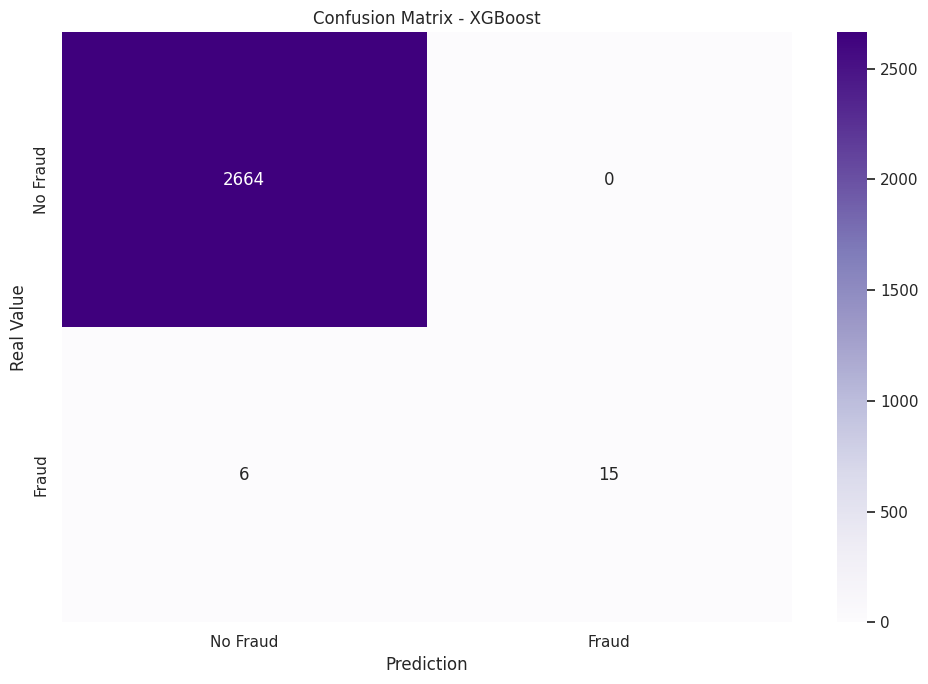

In [169]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_adjusted)

labels = ['No Fraud', 'Fraud']

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.tight_layout()
plt.show()


- **2664 True Normal customer detections**
- **6 False Normal customer detections**
- **0 False Fraud customer detection**
- **15 True Fraud customer detection**



### ROC Curve

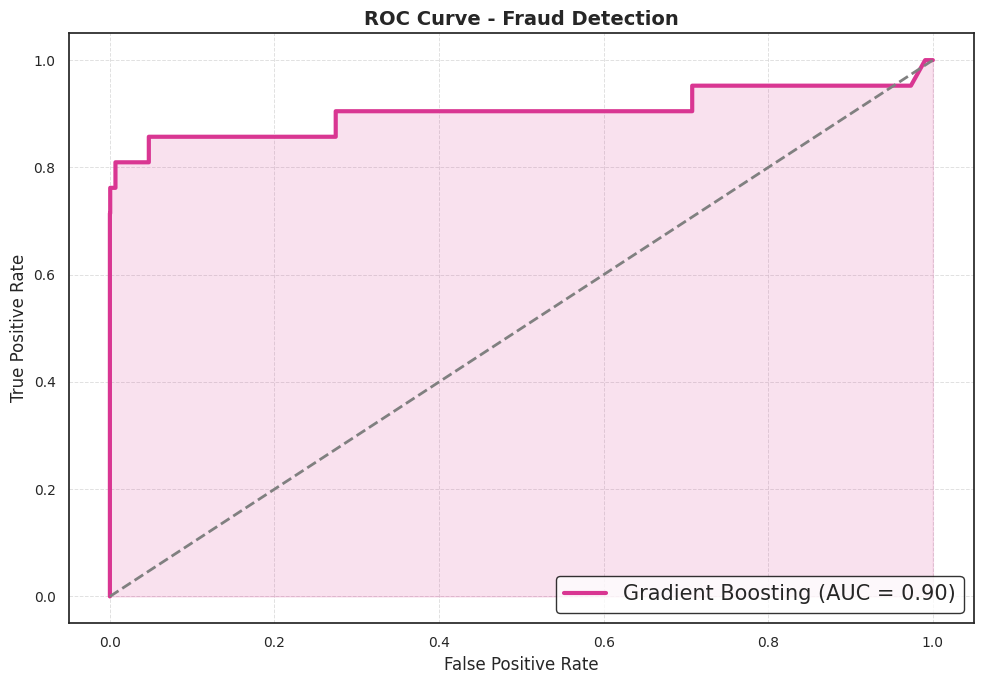

In [159]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#probabilities for fraud
y_prob = xgb_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='#d93692', lw=3, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, color='#d93692', alpha=0.15)  # <- Aquí el relleno
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Fraud Detection', fontsize=14, weight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc="lower right", frameon=True, facecolor='white', edgecolor='black', fontsize=15)

plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

- The model is getting mostly True positives, **it minimizes False positives while correctly detecting fraud**.
- We **achieve high recall without sacrificing too much precision**.
- AUC of 0.90 is far superior to 0.50 (random guessing), proving that **the model is meaningfully predicting fraud cases**.

## THE explanatory variable.

In [161]:
importances = xgb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))


                   Feature  Importance
13                payments    0.216087
2                purchases    0.137181
3         oneoff_purchases    0.110440
11           purchases_trx    0.085620
0                  balance    0.075220
5             cash_advance    0.065249
4   installments_purchases    0.047589
10        cash_advance_trx    0.046939
14        minimum_payments    0.046784
12            credit_limit    0.036357


### Importance score plotting

<ipython-input-164-246e1f94c9c8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


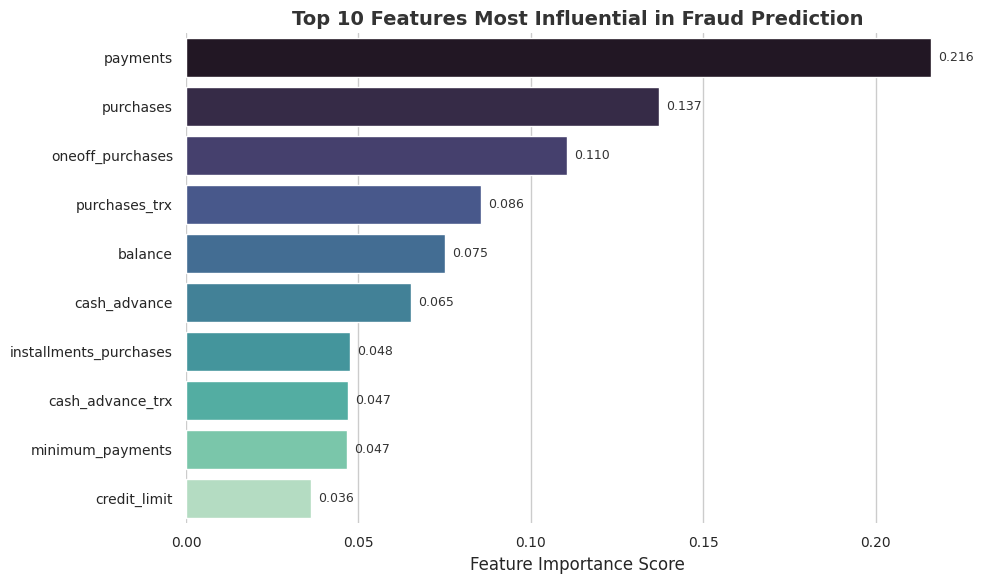

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df.head(10),
    palette='mako'
)


plt.title('Top 10 Features Most Influential in Fraud Prediction', fontsize=14, weight='bold', color='#333333')
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


for i, value in enumerate(importance_df.head(10)['Importance']):
    plt.text(value + 0.002, i, f"{value:.3f}", va='center', fontsize=9, color='#333333')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


Like we suspected...

- **Payments (0.216) is the Most Important Feature**  
  - Suggests that payment behaviors strongly influence fraud predictions. Users who make irregular or unusually high payments might be flagged.
- **Purchases (0.137) and One-Off Purchases (0.110) are highly ranked**
  - Which means high-value transactions play a major role in fraud detection, possibly signaling abnormal spending spikes.

### *As a conclusion...*
Fraud cases often exhibit large transactions or irregular payment patterns, so we can infere that's why higher payment activity and purchases might flag fraud.

- Also high one-time spending can indicate account takeover or fraudulent use.
- And fraud detection might rely more on behavioral activity rather than credit allocation.

**This dataset presented extreme conditions**, characterized by significant bias and class imbalance, making classification and predictive modeling a uniquely challenging task.

*Rather than applying interpolation or over/under sampling—methods that could heavily impact the model’s reliability—I opted for **optimization-based refinement**.*

This approach ensured that I **preserved the integrity of the dataset without eliminating large portions of real data or introducing too many synthetic information**.

- By focusing on technical precision and model optimization, I aimed to develop the cleanest and most robust predictive model possible.




